In [8]:
from fastai.vision import *

In [9]:
path = untar_data(URLs.MNIST_TINY)
tfms = get_transforms(do_flip=False)
path.ls()

/home/gauravp/anaconda3/envs/pytorch/lib/python3.7/site-packages/fastai/datasets.py:164: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  with open(fpath, 'r') as yaml_file: return yaml.load(yaml_file)


[PosixPath('/home/gauravp/.fastai/data/mnist_tiny/valid'),
 PosixPath('/home/gauravp/.fastai/data/mnist_tiny/labels.csv'),
 PosixPath('/home/gauravp/.fastai/data/mnist_tiny/test'),
 PosixPath('/home/gauravp/.fastai/data/mnist_tiny/models'),
 PosixPath('/home/gauravp/.fastai/data/mnist_tiny/train')]

In [10]:
#this is a shortcut to create a image data bunch from teh folder content

data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=64)

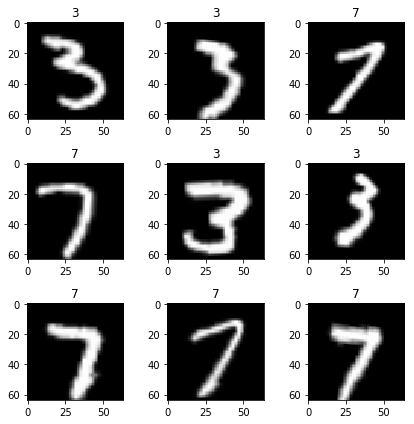

In [11]:
data.show_batch(3, figsize=(6,6), hide_axis=False)

In [12]:
data = (ImageList.from_folder(path) #Where to find the data? -> in path and its subfolders
        .split_by_folder()              #How to split in train/valid? -> use the folders
        .label_from_folder()            #How to label? -> depending on the folder of the filenames
        .add_test_folder()              #Optionally add a test set (here default name is test)
        .transform(tfms, size=64)       #Data augmentation? -> use tfms with a size of 64
        .databunch()) 

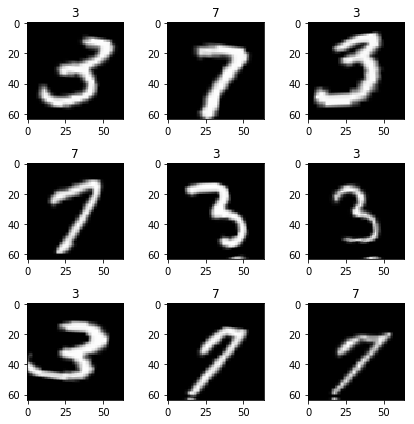

In [13]:
#this is the function to be used in order to displaythe contant of the databunch
data.show_batch(3, figsize=(6,6), hide_axis=False)

In [14]:
data.train_ds[0]

(Image (3, 64, 64), Category 7)

Object `databunch()` not found.


In [17]:
planet = untar_data(URLs.PLANET_TINY)
planet_tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [18]:
pd.read_csv(planet/"labels.csv").head()

,image_name,tags
0,train_31112,clear primary
1,train_4300,partly_cloudy primary water
2,train_39539,clear primary water
3,train_12498,agriculture clear primary road
4,train_9320,clear primary


In [19]:
data = ImageDataBunch.from_csv(planet, folder='train', size=128, suffix='.jpg', label_delim = ' ', ds_tfms=planet_tfms)